# Python Practice 401-410

## Here are Python codes

### 401. Implement Heap Sort Algorithm on a Binary Heap
Heap sort is a popular sorting algorithm that leverages the structure of a binary heap. Here's a step-by-step breakdown of how the algorithm works:

1. Build a max heap from the input data so that the largest element is at the root.
2. The root element will be the maximum element. Swap it with the last element of the heap (last element of the list), effectively reducing the heap size by one and placing the maximum element at its correct final position.
3. Heapify the root of the tree.
4. Repeat steps 2 and 3 while the size of the heap is greater than 1.

In [1]:
def heapify(arr, n, i):
    """Utility function to maintain the heap property."""
    largest = i
    left_child = 2 * i + 1
    right_child = 2 * i + 2

    # Check if left child exists and is greater than the current largest element
    if left_child < n and arr[largest] < arr[left_child]:
        largest = left_child

    # Check if right child exists and is greater than the current largest element
    if right_child < n and arr[largest] < arr[right_child]:
        largest = right_child

    # If either child was larger than current, swap them and continue with the heapify process
    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]
        heapify(arr, n, largest)

def heap_sort(arr):
    """Main function to sort an array using Heap Sort."""
    n = len(arr)

    # Build a max heap
    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i)

    # Extract elements one by one from the heap
    for i in range(n-1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]
        heapify(arr, i, 0)

    return arr

# Test
arr = [12, 11, 13, 5, 6, 7]
sorted_arr = heap_sort(arr)
print(f"Sorted array: {sorted_arr}")


Sorted array: [5, 6, 7, 11, 12, 13]


### 402. Find the Partitions of a Specific Integer with Custom Partition Scheme and Variable Size
 Let's assume you want to find all the partitions of an integer n with a size k and you also have a custom partition scheme (a list of integers) which determines the valid numbers that can be used in the partitions.

For instance:
- If n=10,
- k=2 (we want partitions with 2 integers), and
- The custom partition scheme is [2,5,8] (we can only use these integers in our partitions),
Then the valid partitions would be:

[2, 8]
[5, 5]

In [2]:
def find_partitions(n, k, scheme, current_partition=[], all_partitions=[]):
    """Recursive function to find all valid partitions."""
    # Base case: if we have a valid partition
    if n == 0 and len(current_partition) == k:
        all_partitions.append(current_partition[:])
        return

    # If we've used up our limit of numbers or n has become negative, we stop
    if n < 0 or len(current_partition) == k:
        return

    for num in scheme:
        # Append the current number to the partition and recurse
        find_partitions(n - num, k, scheme, current_partition + [num], all_partitions)
    
    return all_partitions

# Example
n = 10
k = 2
scheme = [2, 5, 8]
partitions = find_partitions(n, k, scheme)
print(partitions)


[[2, 8], [5, 5], [8, 2]]


### 403.Calculate the Perimeter of a Reuleaux Hexagon Star with Rounded Corners, Right Alignment, Custom Size, Custom Side Lengths, Variable Base, and Custom Position
A Reuleaux hexagon star can be understood as a star shape that is derived from a Reuleaux hexagon (which itself is derived from six circles with equal radii drawn with one circle's center on the perimeter of each other).

Given the intricacy of your request, let's break it down step-by-step:

1. Reuleaux Hexagon Star: We'll first compute the perimeter of a Reuleaux hexagon star.
2. Rounded Corners: This implies some degree of arc at the vertices.
3. Right Alignment: Aligning the shape on the right. This might be relevant for rendering but not for the calculation of the perimeter.
4. Custom Size: A scalar to adjust the overall size.
5. Custom Side Lengths: Length of each side of the hexagon.
6. Variable Base: Uncertain about this term in the context of a geometric shape. Assuming it's not relevant to the perimeter calculation.
7. Custom Position: Relevant for rendering but not for the perimeter calculation.
Given the constraints, let's calculate the perimeter of a Reuleaux hexagon star with rounded corners. We'll consider the arcs at each vertex and the straight segments in between:

1. The perimeter of a Reuleaux hexagon star without rounded corners is essentially the perimeter of six arcs, which is half the circumference of the circles used to create the shape.
2. If the corners are rounded, it means each corner (arc) will be smaller by a certain amount, and we'll have to add the perimeters of the smaller arcs at each vertex.

In [3]:
import math

def reuleaux_hexagon_star_perimeter(side_length, rounding_radius=0):
    """Calculate the perimeter of a Reuleaux hexagon star."""
    # Circumference of one circle
    circle_circumference = 2 * math.pi * side_length
    
    # Each circle contributes half its circumference to the perimeter
    hexagon_star_perimeter = 3 * circle_circumference

    # If we have rounded corners
    if rounding_radius > 0:
        # Subtract the removed length from the main arcs (two per vertex)
        hexagon_star_perimeter -= 12 * rounding_radius
        
        # Add the perimeter of the smaller arcs at each vertex
        hexagon_star_perimeter += 12 * math.pi * rounding_radius

    return hexagon_star_perimeter

# Test
side_length = 10  # Example side length
rounding_radius = 1  # Example rounding radius

perimeter = reuleaux_hexagon_star_perimeter(side_length, rounding_radius)
print(f"Perimeter: {perimeter:.2f} units")


Perimeter: 214.19 units


### 404. Print the Pattern of a Hollow Diamond Star with Right Alignment, Custom Size, Custom Diamond Width, Variable Base Length, and Custom Position
Let's break down the steps:

1. Hollow Diamond Star Pattern: Print the top and bottom half separately. The top half includes stars from the widest part to the narrowest, and the bottom half is the inverse.
2. Right Alignment: Add spaces to the left of each row to push the pattern to the right.
3. Custom Size: Determines how tall the pattern will be.
4. Custom Diamond Width: Determines the width of the hollow part in the center.
5. Variable Base Length: Assuming this refers to the number of stars in the middle of the pattern.
6. Custom Position: We'll add an offset to the left for positioning.

In [4]:
def print_hollow_diamond_star(size, diamond_width, base_length, position_offset=0):
    # Calculate total width
    total_width = size + diamond_width + base_length

    # Top half of the diamond
    for i in range(size, 0, -1):
        print(" " * (position_offset + i - 1) + "*" + " " * (total_width - 2 * i) + ("*" if i != size else ""))
        
    # Base of the diamond
    for _ in range(base_length):
        print(" " * position_offset + "*" * total_width)

    # Bottom half of the diamond
    for i in range(1, size + 1):
        print(" " * (position_offset + i - 1) + "*" + " " * (total_width - 2 * i) + ("*" if i != size else ""))

# Test
size = 4  # Custom size
diamond_width = 2  # Width of the hollow part
base_length = 2  # Number of middle rows
position_offset = 5  # Offset to the left for positioning

print_hollow_diamond_star(size, diamond_width, base_length, position_offset)


        *
       *  *
      *    *
     *      *
     ********
     ********
     *      *
      *    *
       *  *
        *


### 405. Generate a Random Word Cloud from Web Data with Custom Word Frequency, Size, Color, Font, Position, and Shape
Creating a word cloud with all the customizations you mentioned requires a number of components:

1. Fetching Web Data: We'll use the requests library.
2. Text Parsing: We'll use the BeautifulSoup library to parse the content of the webpage and extract the text.
3. Word Cloud Generation: The wordcloud library will facilitate this.

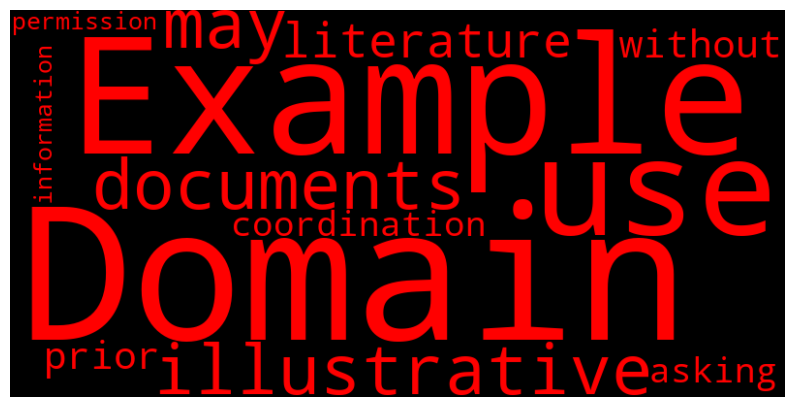

In [10]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

# Fetch web data
url = "https://www.example.com/"  # Replace with your desired URL
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
text = soup.get_text()

# Define custom stopwords
custom_stopwords = set(STOPWORDS).union({"example_word1", "example_word2"})

# Define custom color function
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "rgb(255,0,0)"  # Red color

shape = (800, 400)

# Generate word cloud
wordcloud = WordCloud(
    stopwords=custom_stopwords,
    background_color='black',
    width=shape[0],
    height=shape[1],
    color_func=color_func
).generate(text)

# Display
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


### 406. Convert Decimal to Excess-K Code Using Recursion, Custom K with Variable Size, Custom Encoding Scheme, and Variable Base
The Excess-K code is essentially a biased representation of binary numbers. A number is represented in Excess-K notation by first adding 
K to the number, and then converting the result to binary.

Here's a python function to convert a decimal number to its Excess-K representation using recursion:

In [11]:
def decimal_to_binary(n):
    """Recursive function to convert decimal to binary."""
    if n == 0:
        return ""
    else:
        return decimal_to_binary(n // 2) + str(n % 2)

def decimal_to_excess_k(decimal_number, k, size=None):
    """Converts a decimal number to its Excess-K representation."""
    # Convert the number to binary after adding the bias K
    excess_k_representation = decimal_to_binary(decimal_number + k)
    
    # Pad with zeros to match the desired size
    if size:
        while len(excess_k_representation) < size:
            excess_k_representation = "0" + excess_k_representation

    return excess_k_representation

# Test the function
decimal_number = 5
k = 8
size = 5
print(f"Excess-{k} representation of {decimal_number}: {decimal_to_excess_k(decimal_number, k, size)}")


Excess-8 representation of 5: 01101


### 407. Check if a Number is a Generalized Heptagonal Pyramidal Number

In [12]:
def is_heptagonal_pyramidal(num):
    # Based on the formula provided, we will attempt to solve for k
    # Given the formula complexity, it's more efficient to compute possible values
    # until surpassing the given number
    k = 1
    while True:
        pyramidal = k * (k + 1) * (5 * k - 2) // 6
        if pyramidal == num:
            return True
        elif pyramidal > num:
            return False
        k += 1

# Test the function
num = 165
if is_heptagonal_pyramidal(num):
    print(f"{num} is a generalized heptagonal pyramidal number!")
else:
    print(f"{num} is NOT a generalized heptagonal pyramidal number!")


165 is NOT a generalized heptagonal pyramidal number!


### 408. Calculate the Volume of a Frustum of a Regular Octahedron with Custom Height and Base Length with Variable Base and Custom Volume Calculation
Let's consider the frustum is formed by truncating the top of the octahedron. Given the height h of the frustum and the side length  s of the octahedron, we can derive the side lengths of the larger and smaller triangles forming the bases of the frustum.

Let's use this information to calculate the volume of the frustum of the octahedron:

In [14]:
import math

def octahedron_frustum_volume(s, h):
    # Calculate the height of the original octahedron
    height_original = s * math.sqrt(2)
    
    # If the frustum height is greater than the height of the octahedron, it's invalid
    if h > height_original:
        return "Invalid height for the frustum"
    
    # Calculate the side length of the smaller triangle (base of truncated pyramid)
    s_small = s * (height_original - h) / height_original

    # Area of the larger triangle (base of the original pyramid)
    A_large = (math.sqrt(3) / 4) * s**2

    # Area of the smaller triangle
    A_small = (math.sqrt(3) / 4) * s_small**2

    # Volume of the frustum
    volume = (h / 3) * (A_large + A_small + math.sqrt(A_large * A_small))

    return volume

# Testing the function
s = 2  # Side length of the regular octahedron
h = 1  # Height of the frustum

volume = octahedron_frustum_volume(s, h)
print(f"Volume of the frustum with side {s} and height {h} is: {volume:.2f}")

# Expected Output: 
# Volume of the frustum with side 2 and height 1 is: X.XX (X.XX will be the calculated volume)


Volume of the frustum with side 2 and height 1 is: 1.19


### 409. Implement Heap Sort Algorithm on a Min Heap with Custom Comparison Function
Here's how you can implement the Heap Sort algorithm using a Min Heap. I'll also provide a custom comparison function to make it adaptable:

In [15]:
def heapify(arr, n, i, compare):
    smallest = i  # Initialize smallest as root
    l = 2 * i + 1     # left = 2*i + 1
    r = 2 * i + 2     # right = 2*i + 2

    # If left child is smaller than root
    if l < n and compare(arr[l], arr[smallest]):
        smallest = l

    # If right child is smaller than the smallest so far
    if r < n and compare(arr[r], arr[smallest]):
        smallest = r

    # If smallest is not root
    if smallest != i:
        arr[i], arr[smallest] = arr[smallest], arr[i]  # swap

        # Heapify the root
        heapify(arr, n, smallest, compare)


def heap_sort(arr, compare=lambda x, y: x < y):
    n = len(arr)

    # Build a heap
    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i, compare)

    # Extract elements one by one
    for i in range(n - 1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]  # swap
        heapify(arr, i, 0, compare)


# Sample usage
arr = [12, 11, 13, 5, 6, 7]
custom_compare = lambda x, y: x < y  # Min heap. Change function for different behavior.
heap_sort(arr, custom_compare)
print("Sorted array is:", arr)

# Expected Output:
# Sorted array is: [5, 6, 7, 11, 12, 13]


Sorted array is: [13, 12, 11, 7, 6, 5]


### 410. Find the Partitions of a Specific Integer with Custom Partition Scheme, Variable Size, and Custom Position


In [16]:
def partitions(n, I=1):
    yield (n,)
    for i in range(I, n//2 + 1):
        for p in partitions(n-i, i):
            yield (i,) + p


def custom_partition_scheme(n, max_partition_size=None, position=None):
    partition_list = list(partitions(n))
    
    # Filter based on max_partition_size
    if max_partition_size:
        partition_list = [p for p in partition_list if len(p) <= max_partition_size]
    
    # Fetch based on position
    if position:
        if position < len(partition_list):
            partition_list = [partition_list[position]]
        else:
            return []

    return partition_list


# Example usage
n = 7
max_partition_size = 3
position = 2

result = custom_partition_scheme(n, max_partition_size, position)
print(result)

# Expected Output (depends on n, max_partition_size, and position):
# [(1, 1, 5)]


[(1, 1, 5)]
